## Documenting Hang Computing Global Overturning in KDS75

In [1]:
# Load modules
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # plot on map projections
import seaborn as sns

from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
from mpl_toolkits.basemap import Basemap # plot on map projections
import xarray as xr
import os # operating system interface

netcdf_index loaded.


In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
cc.start_cluster(diagnostics_port=8787)

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 8787:127.0.0.1:8787 vdi-n6.nci.org.au -l pas561


Client Scheduler: tcp://127.0.0.1:42392 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [4]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)
#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.10.0


In [5]:
cc.build_index()

Files found but not yet indexed: 0
No new .nc files found.


True

In [6]:
configuration = 'mom01v5'
expts = cc.get_experiments(configuration)
display(expts)


['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_newbathy_JRA_runoff',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind',
 'kds75_cp',
 'kds75_wp2']

kds75_cp


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=67), HTML(value='')))

(67, 80, 2700)
/g/data3/hh5/tmp/pas561/kds75_cp/gmoc_adv_rho.npy


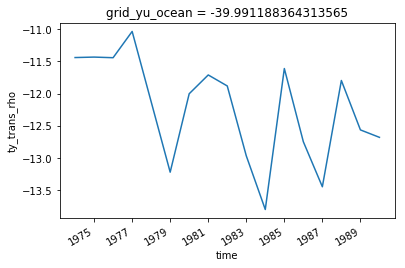

In [8]:
#this has a memory error for kds75_cp, 
#it works for kds75_wp2 which has fewer output dirs
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp/'
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/'

expts = ['kds75_cp']
#expts = ['kds75_wp2']

for e in expts:
    print(e)
    psi = cc.get_nc_variable(e, 'ocean.nc', 'ty_trans_rho',
                          chunks={'potrho': None},
                          time_units = 'days since 1860-01-01')
    psi = psi.sum('grid_xt_ocean')
    psi_sum = psi.cumsum('potrho') - psi.sum('potrho')
    psi_aabw = psi_sum.sel(method='Nearest',grid_yu_ocean=-40).sel(potrho=slice(1036,None))\
                .min('potrho').resample(time='A').mean()
    psi_aabw = psi_aabw.compute()
    psi_aabw.plot(label=e)
    
    if e == 'kds75_cp':
        cntrl_gmoc = psi_sum
        print(cntrl_gmoc.shape)
        of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
        print(of)
        a=np.save(of,cntrl_gmoc)
    if e == 'kds75_wp2':
        pert_gmoc = psi_sum
        print(pert_gmoc.shape)
        of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
        a=np.save(of,pert_gmoc)
    

In [8]:
print(cntrl_gmoc.shape)
of=os.path.join('/g/data1/v45/pas561/','gmoc_adv_rho.npy')
print(of)
a=np.save('/g/data1/v45/pas561/gmoc_adv_rho.npy',cntrl_gmoc)

(67, 80, 2700)
/g/data1/v45/pas561/gmoc_adv_rho.npy


KeyboardInterrupt: 

tornado.application - ERROR - Exception in callback <bound method WorkStealing.balance of <distributed.stealing.WorkStealing object at 0x7fbe63c9cb70>>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/ioloop.py", line 1026, in _run
    return self.callback()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/stealing.py", line 249, in balance
    if occupancy[sat] < 0.2:
KeyError: 'tcp://127.0.0.1:35472'
tornado.application - ERROR - Exception in callback <bound method WorkStealing.balance of <distributed.stealing.WorkStealing object at 0x7fbe63c9cb70>>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/ioloop.py", line 1026, in _run
    return self.callback()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/stealing.py", line 249, 

tornado.application - ERROR - Exception in callback <bound method WorkStealing.balance of <distributed.stealing.WorkStealing object at 0x7fbe63c9cb70>>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/ioloop.py", line 1026, in _run
    return self.callback()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/stealing.py", line 249, in balance
    if occupancy[sat] < 0.2:
KeyError: 'tcp://127.0.0.1:35472'
tornado.application - ERROR - Exception in callback <bound method WorkStealing.balance of <distributed.stealing.WorkStealing object at 0x7fbe63c9cb70>>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/ioloop.py", line 1026, in _run
    return self.callback()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/stealing.py", line 249, 

tornado.application - ERROR - Exception in callback <bound method WorkStealing.balance of <distributed.stealing.WorkStealing object at 0x7fbe63c9cb70>>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/ioloop.py", line 1026, in _run
    return self.callback()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/stealing.py", line 249, in balance
    if occupancy[sat] < 0.2:
KeyError: 'tcp://127.0.0.1:35472'
tornado.application - ERROR - Exception in callback <bound method WorkStealing.balance of <distributed.stealing.WorkStealing object at 0x7fbe63c9cb70>>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/ioloop.py", line 1026, in _run
    return self.callback()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/stealing.py", line 249, 

tornado.application - ERROR - Exception in callback <bound method WorkStealing.balance of <distributed.stealing.WorkStealing object at 0x7fbe63c9cb70>>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/ioloop.py", line 1026, in _run
    return self.callback()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/stealing.py", line 249, in balance
    if occupancy[sat] < 0.2:
KeyError: 'tcp://127.0.0.1:35472'
tornado.application - ERROR - Exception in callback <bound method WorkStealing.balance of <distributed.stealing.WorkStealing object at 0x7fbe63c9cb70>>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/ioloop.py", line 1026, in _run
    return self.callback()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/stealing.py", line 249, 